In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)
df = pd.read_pickle('../data/train_transformed.p')

In [2]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def two_sample_perm_test(data_1,data_2,size=100,two_sided=True):
    empirical_diff_means = diff_of_means(data_1,data_2)
    perm_replicates = draw_perm_reps(data_1, data_2, diff_of_means, size=size)
    if two_sided:
        empirical_diff_means = np.abs(empirical_diff_means)
        perm_replicates = np.abs(perm_replicates)
    p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
    return p

def two_sample_perm_test_df_column(column,size=100,two_sided=True):
    data_1 = df.loc[df['labels'] == 0,column].values
    data_2 = df.loc[df['labels'] == 1,column].values
    p = two_sample_perm_test(data_1,data_2,size=size,two_sided=two_sided)
    return p
    

In [3]:
f_to_use_tree = ['user_total_orders',
       'user_total_items', 'user_total_distinct_items',
       'user_average_days_between_orders', 'user_order_size_mean','user_order_size_max','user_order_size_std',
       'user_total_item_quantity', 'user_total_spent',
       'user_sum_days_between_orders', 'user_reorder_ratio',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'product_reorder_rate',
       'product_total_quantity_sold', 'product_avg_price', 'prod_first_buy',
       'prod_1reorder_ratio',
       'UP_orders', 'UP_orders_ratio', 'UP_total_quantity',
       'UP_order_rate_since_first_order']
f_to_use_lgr = ['user_total_orders', 'user_average_days_between_orders', 'user_order_size_mean', 
             'user_total_item_quantity', 'order_hour_of_day','order_dow', 'days_since_ratio',
             'product_orders', 'product_avg_price', 
             'UP_orders', 'UP_total_quantity', 
             'user_sum_days_between_orders','user_reorder_ratio','prod_1reorder_ratio']

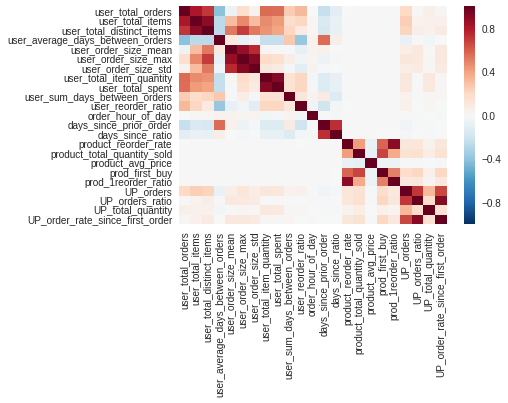

In [4]:
sns.heatmap(df[f_to_use_tree].corr())

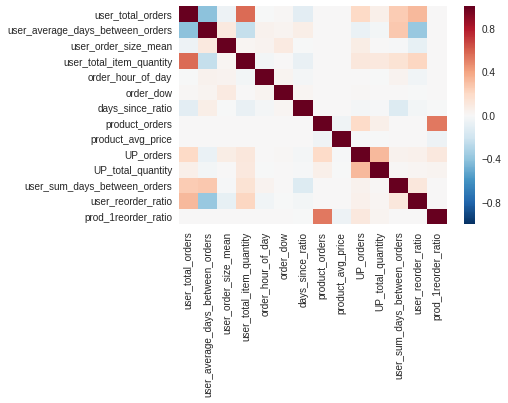

In [5]:
sns.heatmap(df[f_to_use_lgr].corr())

In [6]:
import time

p_dict_tree = {}

for f in f_to_use_tree:
    t0 = time.time()
    p_dict_tree[f] = two_sample_perm_test_df_column(f,100)
    print (f,p_dict_tree[f],time.time()-t0)

user_total_orders 0.03 13.597387790679932
user_total_items 0.0 13.343283414840698
user_total_distinct_items 0.0 13.303053379058838
user_average_days_between_orders 0.0 12.891197443008423
user_order_size_mean 0.0 13.276370763778687
user_order_size_max 0.0 13.717911720275879
user_order_size_std 0.0 12.898118495941162
user_total_item_quantity 0.0 12.55759572982788
user_total_spent 0.0 12.88417673110962
user_sum_days_between_orders 0.0 12.995038270950317
user_reorder_ratio 0.0 13.158185720443726
order_hour_of_day 0.0 13.444733381271362
days_since_prior_order 0.0 13.005485773086548
days_since_ratio 0.0 13.036758422851562
product_reorder_rate 0.0 13.015391111373901
product_total_quantity_sold 0.0 12.932319402694702
product_avg_price 0.0 13.261153936386108
prod_first_buy 0.0 13.209758043289185
prod_1reorder_ratio 0.0 13.214207172393799
UP_orders 0.0 13.650303602218628
UP_orders_ratio 0.0 13.686595439910889
UP_total_quantity 0.0 13.373246908187866
UP_order_rate_since_first_order 0.0 13.2303736

In [7]:
p_dict_tree

{'UP_order_rate_since_first_order': 0.0,
 'UP_orders': 0.0,
 'UP_orders_ratio': 0.0,
 'UP_total_quantity': 0.0,
 'days_since_prior_order': 0.0,
 'days_since_ratio': 0.0,
 'order_hour_of_day': 0.0,
 'prod_1reorder_ratio': 0.0,
 'prod_first_buy': 0.0,
 'product_avg_price': 0.0,
 'product_reorder_rate': 0.0,
 'product_total_quantity_sold': 0.0,
 'user_average_days_between_orders': 0.0,
 'user_order_size_max': 0.0,
 'user_order_size_mean': 0.0,
 'user_order_size_std': 0.0,
 'user_reorder_ratio': 0.0,
 'user_sum_days_between_orders': 0.0,
 'user_total_distinct_items': 0.0,
 'user_total_item_quantity': 0.0,
 'user_total_items': 0.0,
 'user_total_orders': 0.029999999999999999,
 'user_total_spent': 0.0}

In [8]:
p_dict_lgr = {}

for f in f_to_use_lgr:
    t0 = time.time()
    p_dict_lgr[f] = two_sample_perm_test_df_column(f,100)
    print (f,p_dict_lgr[f],time.time()-t0)

user_total_orders 0.01 14.072821617126465
user_average_days_between_orders 0.0 13.582301139831543
user_order_size_mean 0.0 13.191569805145264
user_total_item_quantity 0.0 13.178874969482422
order_hour_of_day 0.0 13.82226824760437
order_dow 0.0 13.306858777999878
days_since_ratio 0.0 12.849919557571411
product_orders 0.0 13.303898096084595
product_avg_price 0.0 13.300599098205566
UP_orders 0.0 13.197985887527466
UP_total_quantity 0.0 13.185811758041382
user_sum_days_between_orders 0.0 13.636181592941284
user_reorder_ratio 0.0 12.905641794204712
prod_1reorder_ratio 0.0 13.374066352844238


In [9]:
p_dict_lgr

{'UP_orders': 0.0,
 'UP_total_quantity': 0.0,
 'days_since_ratio': 0.0,
 'order_dow': 0.0,
 'order_hour_of_day': 0.0,
 'prod_1reorder_ratio': 0.0,
 'product_avg_price': 0.0,
 'product_orders': 0.0,
 'user_average_days_between_orders': 0.0,
 'user_order_size_mean': 0.0,
 'user_reorder_ratio': 0.0,
 'user_sum_days_between_orders': 0.0,
 'user_total_item_quantity': 0.0,
 'user_total_orders': 0.01}